(euler-method-section)=
# The Euler method

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Leonhard_Euler.jpg/220px-Leonhard_Euler.jpg
:figclass: margin
:alt: Leonard Euler
:width: 200

Leonard Euler (1707 - 1783)
```

The <a href="https://en.wikipedia.org/wiki/Euler_method" target="_blank">Euler method</a> named after Swiss mathematician <a href="https://en.wikipedia.org/wiki/Leonhard_Euler" target="_blank">Leonard Euler</a> (pronounced *"Oy-ler"*) is the simplest numerical method used to solve ODEs. It is derived by truncating equation the {prf:ref}`Taylor series<taylor-series-definition>` to first-order

$$y(t + h) = y(t) + h y'(t).$$

We want to solve the ODE $y'(t) = f(t, y)$ so replacing $y'(t)$ with $f(t,y)$ we have

$$y(t + h) = y(t) + h f(t, y).$$

For convenience we use a subscript notation where $y(t_n) = y_n$ and $y(t_n+h) = y_{n+1}$. 

````{prf:definition} The Euler method
:label: euler-method-definition

The Euler method for solving the initial value problem $y' = f(t, y)$, $t \in [t_{\min}, t_{\max}]$, $y_0 = y(t_{\min})$ is 

```{math}
:label: euler-method-equation

y_{n+1} = y_n + h f(t_n ,y_n),
```

where $h = t_{n+1} - t_n$.
````

To solve an initial value problem using the Euler method we first initialise $y_0 = \alpha$ and $t_0 = t_{\min}$ then calculate the value of $y_1$ using equation {eq}`euler-method-equation`. Then we use $t_1 = t_0 + h$ and $y_1$ to calculate the value of $y_2$. We continue in this way until we have calculated up to $y_n$ and $t_n$. The Euler method is an example of a **single step method** since it only requires information from a single step of the solution to calculate the next step. The other type of numerical method for solving ODEs is the <a href="https://en.wikipedia.org/wiki/Linear_multistep_method" target="_blank">linear multistep methods</a> that requires information from multiple previous steps.

The solution of the initial value problem using the Euler method will result in two vectors containing the values of $t$ and $y$

$$ \begin{align*}
    \vec{t} &= \begin{pmatrix} t_0 \\ t_1 \\ \vdots \\ t_n \end{pmatrix}, &
    \vec{y} &= \begin{pmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{pmatrix}.
\end{align*} $$ 

```{prf:algorithm} Solving an IVP using the Euler method
**Inputs** A first-order ODE of the form $y' = f(t,y)$, a domain $t \in [t_{\min}, t_{\max}]$, an initial value $y(t_{\min})$ and a step length $h$

**Outputs** $\vec{t}$ and $\vec{y}$

- $\vec{t} \gets (t_{\min}, t_{\min} + h, t_{\min} + 2h, \ldots, t_{\max})$
- $\vec{y} \gets (y_0, 0, \ldots, 0)$ &emsp; (same size as $\vec{t}$)
- For $n = 0, \ldots, \operatorname{length}(\vec{t}) - 1$
    - $y_{n+1} \gets y_n + hf(t_n, y_n)$
- Return $\vec{t}, \vec{y}$
```

````{prf:example}
:label: euler-example

Calculate the solution to the following initial value problem using the Euler method with $h = 0.2$

$$y' = ty, \qquad t\in [0,1], \qquad y(0)=1.$$

```{dropdown} Solution (click to show)

Here the ODE function is $f(t, y) = ty$, the lower bound of the domain is $t_{\min}=0$, the initial value is $y(t_{\min}) = 1$ and the step length is $h=0.2$. Since we are using a constant step length we know that the values of $t$ are $t_n = nh$, i.e.,

$$ \vec{t} = \begin{pmatrix} 0.0 \\ 0.2 \\ 0.4 \\ 0.6 \\ 0.8 \\ 1.0 \end{pmatrix}.$$

The values of $y_n$ are calculated using equation {eq}`euler-method-equation` we have

$$ \begin{align*}
    y_0 &= 1, \\
    y_1 &= y_0 + h f(t_0, y_0) = y_0 + h t_0 y_0 \\ 
    &= 1 + 0.2(0)(1) = 1,  \\
    y_2 &= y_1 + h f(t_1, y_1) = y_1 + h t_1 y_1 \\
    &= 1 + 0.2(0.2)(1) = 1.04, \\
    y_3 &= y_2 + h f(t_2, y_2) = y_2 + h t_2 y_2 \\
    &= 1.04 + 0.2(0.4)(1.04) = 1.1232, \\
    y_4 &= y_3 + h f(t_3, y_3) = y_3 + h t_3 y_3 \\
    &= 1.1232 + 0.2(0.6)(1.1232) = 1.257984, \\
    y_5 &= y_4 + h f(t_4, y_4) = y_4 + h t_4 y_4 \\
    &= 1.257984 + 0.2(0.8)(1.257984) = 1.459261, \\
\end{align*} $$
 
So the solution to this IVP is

$$ \begin{align*}
    \vec{y} &= \begin{pmatrix} 1 \\ 1 \\ 1.04 \\ 1.1232 \\ 1.257984 \\ 1.459261 \end{pmatrix}.
\end{align*} $$
````

(euler-code-section)=
## Code

You may have noticed that calculating the solution to an initial value problem using a numerical method using a pen, paper and calculator is a tedious exercise requiring lots of repeated calculations. Fortunately we have computers to do this work for us. 

Below is a function called `solveIVP()` which solves an IVP using a single step method such as the Euler method. 

`````{tab-set}

````{tab-item} Python
```python
def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def euler(f, t, y, h): 
    return y + h * f(t, y)
```
````

````{tab-item} MATLAB
```matlab
function [t, y] = solveIVP(f, tspan, y0, h, solver)

% Define t and y arrays
t = (tspan(1) : h : tspan(2));
y = zeros(length(t), length(y0));
y(1,:) = y0;

% Loop through the steps and calculate single step solver solution
for n = 1 : length(t) - 1
    y(n+1,:) = solver(f, t(n), y(n,:), h);
end

end


function ynew = euler(f, t, y, h)

ynew = y + h * f(t, y);

end
```
````

`````

The inputs to the function are:

- `f` - the name of the ODE function to be solved (this needs to be defined elsewhere)
- `tspan` - an array of two values defining the lower and upper boundaries of the $t$ domain
- `y0` - an array of values containing the initial values of the solution to the ODE
- `h` - the step length
- `solver` - the name of the solver that we are going to use to calculate the solution to the IVP (this needs to be defined elsewhere)

The function first calculates creates two arrays `t` and `y` which store the values of $t$ and $y$. Since we are using a constant step length[^1] `h`, we generate the values of `t` using array commands. The `y` array has the same number of rows as the `t` array and the same number of columns as elements in `y0` so that our solver can deal with multiple ODEs at the same time. The first row of `y` is set equal to `y0`. A for loop is used to step through the domain and calculate the solution at each step using the `solver()` function. 
 
[^1]: We will be using a variable step length when we look at [adaptive step size control](adaptive-step-size-control-section) methods which requires a slightly different approach. 

We have also defined the function `euler()` which calculates the Euler method solution over a single step of length `h` given input values of `t` and `y` and the ODE function `f`. Now we need some code that defines the IVP being solved and invokes our `solveIVP()` function. Using functions in this way allows us to easily use other IVP solvers without needing to repeat lots of code (this is a programming concept known as DRY - Don't Repeat Yourself).

The code below solves the IVP from {prf:ref}`euler-example` and outputs the solution as a table and a plot.

`````{tab-set}
````{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

# Define the ODE function
def f(t, y):
    return t * y


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # initial values
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, euler)

# Print table of solution values
print("|  t   |     y     | ")
print("|:----:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} |")

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.show()
```

<iframe width="560" height="315" src="https://www.youtube.com/embed/N7Oh0mk4YGc?si=QNTPY-__GJaWLHQd" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
````

````{tab-item} MATLAB
```matlab
% Define ODE function
f = @(t, y) t * y;

% Define IVP parameters
tspan = [0, 1];     % boundaries of the t domain
y0 = [1];           % initial values
h = 0.2;            % step length

% Calculate the solution to the IVP
[t, y] = solveIVP(f, tspan, y0, h, @euler);

% Print table of solution values (for loop is used to group print statements)
for i = 1 : 1
    fprintf("|  t   |     y     |\n|:----:|:---------:|");
    for n = 1 : length(t)
        fprintf("\n| %4.2f | %9.6f | %9.6f | %8.2e |", t(n), y(n));
    end
end
% Plot solution
plot(t, y, "b-o", LineWidth=2, MarkerFaceColor="b")
axis padded
xlabel("$t$", FontSize=14, Interpreter="latex")
ylabel("$y$", FontSize=14, Interpreter="latex")
```
<iframe width="560" height="315" src="https://www.youtube.com/embed/lndvU6O38FU?si=ZICo3nEpsyYxCdU9" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

```{important}
- All functions defined in MATLAB must come at the end of the script file beneath all other commands.
- The name of the solver function needs to be preceded by an `@` symbol.
```
````
`````

The output for this code is shown below.

```
|  t   |     y     | 
|:----:|:---------:|
| 0.00 |  1.000000 |
| 0.20 |  1.000000 |
| 0.40 |  1.040000 |
| 0.60 |  1.123200 |
| 0.80 |  1.257984 |
| 1.00 |  1.459261 |
```

```{glue:figure} euler_plot

Plot of the IVP $y' = ty$, $t\in [0, 1]$, $y(0) = 1$ using the Euler method with step length $h=0.2$.
```

|  t   |     y     | 
|:----:|:---------:|
| 0.00 |  1.000000 |
| 0.20 |  1.000000 |
| 0.40 |  1.040000 |
| 0.60 |  1.123200 |
| 0.80 |  1.257984 |
| 1.00 |  1.459261 |


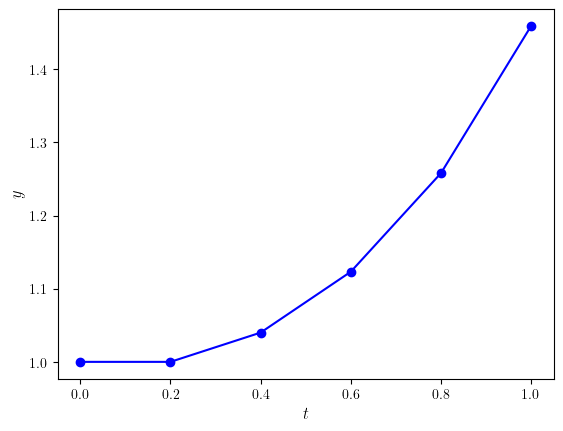

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

# Euler method function
def euler(f, t, y, h): 
    return y + h * f(t, y)


# IVP solver function
def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define the ODE function
def f(t, y):
    return t * y


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # initial values
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, euler)

# Print table of solution values
print("|  t   |     y     | ")
print("|:----:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} |")

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.show()

from myst_nb import glue
glue("euler_plot", fig, display=False)